In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class linearRegression:
    def __init__(self,lr=0.001,n_iter=100):
        self.lr=lr
        self.n_iter=n_iter
        self.weights=None
        self.bias=None
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        for _ in range(self.n_iter):
            y_pred=np.dot(x,self.weights)+self.bias
            #to find the gradient of the cost function with respect to weights
            #t/n_samples is used to normalise the weights
            dw=(1/n_samples)*np.dot(x.T,(y_pred-y))
            db=(1/n_samples)*np.sum(y_pred-y)

        self.weights=self.weights-dw*self.lr
        self.bias=self.bias-db*self.lr
    def predict(self,x):
        y=np.dot(x,self.weights)+self.bias
        return y

In [ ]:
class LinearRegressionModel:
    def __init__(self,lr=0.001,epochs=100):
        self.lr=lr
        self.epochs=epochs
        self.weights=0
        self.bias=0
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        for _ in range(self.epochs):
            y_pred=np.dot(x,self.weights)+self.bias
            dw=(1/n_samples)*np.dot(x.T,(y_pred-y))
            db=(1/n_samples)*np.sum(y_pred-y)
        self.weights=self.weights-dw*self.lr
        self.bias=self.bias-self.lr*db
    def predict(self,x):
        return np.dot(x,self.weights)+self.bias
        return y

In [42]:
x=np.array([[2,4,8,12,16]]).reshape(-1,1)
y=np.array([4,8,16,24,32])
lin_Reg=linearRegression(0.009,10000) 
lin_Reg.fit(x,y)
prediced_line=(lin_Reg.predict(x))

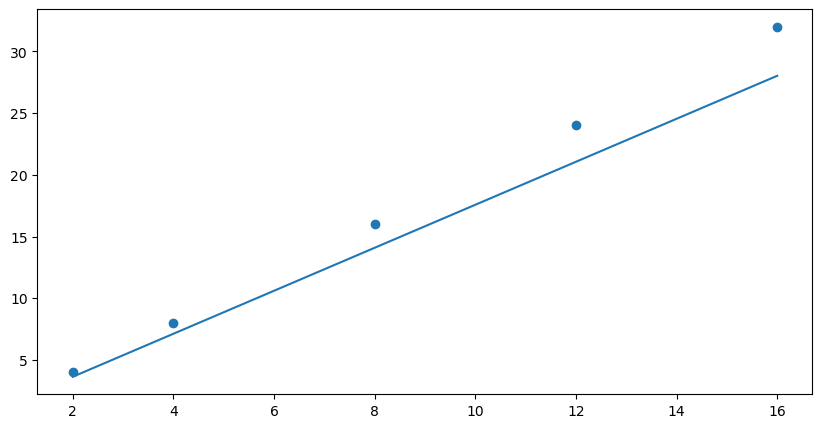

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,prediced_line)

In [47]:
def mse(y,y_pred):
    return np.sum(y_pred-y)/len(y_pred)
mse(y,prediced_line)

-2.012639999999999

In [3]:
#KNN 
import numpy as np
from collections import Counter
def eucledian_distance(x1,x2):
    distance=np.sqrt(np.sum(x1-x2)**2)
    return distance
class KNN:
    def __init__(self,k=3):
        self.k=k
    def fit(self,x,y):
        self.X_train=x
        self.y_train=y
    def predict(self,X):
        predictions=[self.predict_(x) for x in X]
        return predictions
    def predict_(self,x):
        distances=[eucledian_distance(x,x_train) for x_train in self.X_train]
        values=np.argsort(distances)[:self.k]
        labels=[self.y_train[i] for i in values]
        most_common=Counter(labels).most_common()
        return most_common[0][0]

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris=datasets.load_iris()
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=KNN(k=5)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(predictions)
acc=np.sum(predictions==y_test)/len(y_test)
print(acc)

[0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1]
0.9333333333333333
